# Notes for 1 September

Today we'll play with some simulated public health data.

If you copy and paste the following lines into a cell and execute them, you should see rows of pairs of numbers. The first number is a birth weight in pounds and the second number is 0 if the baby was a boy and 1 for girls. This is a 2-dimensional array.

In [2]:
%matplotlib inline
import numpy as np
import pylab

# this next command fetches a datafile from the internet
BabyData = np.genfromtxt('https://wwwx.cs.unc.edu/Courses/comp116-f17/media/fewbabies.txt')
print(BabyData)

[[ 5.34  0.  ]
 [ 3.1   1.  ]
 [ 7.5   1.  ]
 [ 8.56  1.  ]
 [ 6.03  0.  ]
 [ 3.51  0.  ]
 [ 8.25  1.  ]
 [ 3.98  0.  ]
 [ 4.54  0.  ]
 [ 5.85  1.  ]
 [ 5.9   0.  ]
 [ 6.17  0.  ]
 [ 5.83  0.  ]
 [ 6.67  1.  ]
 [ 4.41  0.  ]
 [ 7.63  1.  ]
 [ 4.85  0.  ]
 [ 5.32  1.  ]
 [ 5.48  0.  ]
 [ 4.22  0.  ]]


The `len` function tells us the length of the first dimension of a 2d array.

In [3]:
len(BabyData)

20

Just like strings we can index to get values. With only one index we get back a 1D array.

In [4]:
BabyData[0]

array([ 5.34,  0.  ])

We can get the last row.

In [5]:
BabyData[-1]

array([ 4.22,  0.  ])

Check this out. Here I use slicing to get all the rows and the first column which is the weight.

In [6]:
w = BabyData[0:20,0]

In [7]:
w

array([ 5.34,  3.1 ,  7.5 ,  8.56,  6.03,  3.51,  8.25,  3.98,  4.54,
        5.85,  5.9 ,  6.17,  5.83,  6.67,  4.41,  7.63,  4.85,  5.32,
        5.48,  4.22])

A better way it to let the slice values default. Here I get all the rows, first column without having to know the size of the array.

In [8]:
w = BabyData[:,0]
w

array([ 5.34,  3.1 ,  7.5 ,  8.56,  6.03,  3.51,  8.25,  3.98,  4.54,
        5.85,  5.9 ,  6.17,  5.83,  6.67,  4.41,  7.63,  4.85,  5.32,
        5.48,  4.22])

I can get the weight of the average baby.

In [9]:
np.mean(w)

5.657

And the standard deviation of the weights.

In [10]:
np.std(w)

1.4785063408724359

To show the slicing works as you'd expect I got the weight of every other baby.

In [11]:
BabyData[::2,0]

array([ 5.34,  7.5 ,  6.03,  8.25,  4.54,  5.9 ,  5.83,  4.41,  4.85,  5.48])

We can access individual items. Here is the gender of the 11th baby.

In [12]:
BabyData[10,1]

0.0

We can get the max weight.

In [13]:
np.max(w)

8.5600000000000005

And the minimum weight.

In [14]:
np.min(w)

3.1000000000000001

We can find the index of the minimum weight.

In [15]:
np.argmin(w)

1

Or of the maximum weight.

In [16]:
np.argmax(w)

3

Let's pull the gender column out into its own array.

The we might apply argmax to the weight to get the index of the heaviest baby and use it to get that baby's gender.

In [17]:
g = BabyData[:,1]
g[np.argmax(w)]

1.0

Of course it works for argmin (or any expression).

In [18]:
g[np.argmin(w)]

1.0

Here we are asking the question, "Is the gender female?", and we get answers of True and False.

In [19]:
g == 1

array([False,  True,  True,  True, False, False,  True, False, False,
        True, False, False, False,  True, False,  True, False,  True,
       False, False], dtype=bool)

We can use `Boolean` values like this to select elements from an array. Below we get the weights of the girl babies.

In [20]:
w[g == 1]

array([ 3.1 ,  7.5 ,  8.56,  8.25,  5.85,  6.67,  7.63,  5.32])

The mean of the weights of the girl babies.

In [21]:
np.mean(w[g == 1])

6.6100000000000003

The mean of the weight of the boys.

In [22]:
np.mean(w[g == 0])

5.0216666666666656

We can write complicated expressions to select just the values we want. Here we are getting the weights of the babies who weight more than 1 standard deviation more than the mean.

In [23]:
w [ w > np.mean(w) + np.std(w) ]

array([ 7.5 ,  8.56,  8.25,  7.63])

We could find outliers as suggested by one of you. There aren't any in this group.

In [24]:
w [ w > np.mean(w) + 3*np.std(w) ]

array([], dtype=float64)

We can plot a histogram of the values

(array([ 2.,  1.,  3.,  1.,  4.,  4.,  1.,  0.,  2.,  2.]),
 array([ 3.1  ,  3.646,  4.192,  4.738,  5.284,  5.83 ,  6.376,  6.922,
         7.468,  8.014,  8.56 ]),
 <a list of 10 Patch objects>)

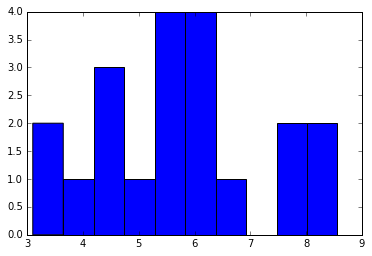

In [25]:
pylab.hist(w)

We can count the number of girls. True is "nonzero" so we are counting the True values.

In [26]:
np.count_nonzero(g == 1)

8

We started with a tiny dataset. More babies are available at this address.

In [27]:
B = np.genfromtxt('https://wwwx.cs.unc.edu/Courses/comp116-f17/media/babies.txt')
print(len(B))

439


All the same things work on the bigger dataset.

(array([ 65.,  56.,  68.,  84.,  71.,  50.,  21.,  18.,   3.,   3.]),
 array([  2.58,   3.43,   4.28,   5.13,   5.98,   6.83,   7.68,   8.53,
          9.38,  10.23,  11.08]),
 <a list of 10 Patch objects>)

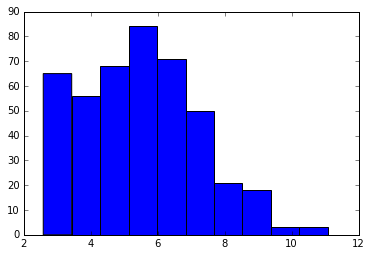

In [28]:
pylab.hist(B[:,0])

I can pull out the weights, and genders and print some stats all without having to know how many there are.

In [29]:
w = B[:,0]
g = B[:,1]
print('Girls', np.count_nonzero(g == 1), np.mean(w[g == 1]))

Girls 210 5.5039047619


In [30]:
print('Boys', np.count_nonzero(g < 1), np.mean(w[g == 0]))

Boys 229 5.45812227074
